In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from feature_engine.outlier_removers import Winsorizer

# for Q-Q plots
import scipy.stats as stats

pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)

import warnings
warnings.filterwarnings("ignore")

In [2]:
testset = pd.read_csv('testnum.csv')

In [3]:
testset.shape

(1576, 39)

In [4]:
testset.head()

,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
0,52842.0,5403.0,26.840,330.127474,27.960,0.924234,0.025049,0.034351,0.001978,0.002308,0.000000,0.012080,0.000000,11.469,0.436,0.075,0.218,0.057,0.284,0.257,0.114,0.080,0.04800,0.332,13.194028,3.31,19.83,293,4880.0,2710.0,0.512,0.215,0.177,0.174651,0.395210,0.274451,0.155689,9.828291,10.628268
1,212287.0,53502.0,57.534,6032.000000,33.072,0.398318,0.484635,0.063760,0.001394,0.021801,0.000199,0.028500,0.001394,19.170,0.524,0.062,0.225,0.058,0.282,0.187,0.097,0.120,0.16400,0.252,12.419433,26.93,10.83,308,850.0,1009.0,0.522,0.192,0.113,0.168327,0.230080,0.241036,0.360558,13.285546,8.818293
2,81263.0,13368.0,39.994,1012.000000,32.044,0.483789,0.381916,0.099035,0.002509,0.009255,0.000800,0.018710,0.003988,17.408,0.464,0.094,0.250,0.081,0.349,0.121,0.137,0.099,0.16515,0.308,11.877446,10.26,23.25,269,2980.0,2459.0,0.526,0.240,0.153,0.201816,0.329970,0.287588,0.180626,11.571830,10.136089
3,122870.0,19359.0,41.865,330.127474,30.724,0.468043,0.088393,0.368847,0.003210,0.046383,0.002206,0.021934,0.000984,18.560,0.468,0.040,0.368,0.148,0.339,0.226,0.100,0.099,0.15000,0.320,9.826327,8.25,21.27,340,2259.0,1240.0,0.491,0.282,0.111,0.239563,0.277336,0.333996,0.149105,17.191860,10.089273
4,146153.0,15766.0,30.681,644.000000,30.860,0.651511,0.251317,0.047687,0.005197,0.016952,0.000900,0.025737,0.000700,10.460,0.470,0.058,0.211,0.084,0.290,0.191,0.104,0.090,0.15300,0.246,12.530045,5.30,16.52,263,1919.0,2509.0,0.516,0.259,0.108,0.100100,0.289289,0.360360,0.250250,12.463880,6.432751


In [5]:
testset.describe()

,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
count,1.576000e+03,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000
mean,9.335925e+04,13026.646574,28.604343,330.127474,28.491293,0.777703,0.089202,0.084696,0.015787,0.012361,0.000833,0.018565,0.000852,12.223749,0.472693,0.062339,0.215020,0.085459,0.306643,0.213584,0.107628,0.083731,0.165150,0.279910,11.616655,5.794270,21.381094,278.209391,3517.072109,2619.026263,0.500537,0.228711,0.167240,0.145707,0.348718,0.302235,0.203340,11.750982,10.390796
std,2.620079e+05,43974.207970,8.011919,1048.528767,4.464953,0.193223,0.144440,0.128088,0.064822,0.026029,0.004712,0.018096,0.001599,5.683836,0.074010,0.022760,0.064685,0.038671,0.041176,0.057623,0.022465,0.020182,0.043644,0.052717,1.521033,3.194786,9.519648,59.803588,2690.466542,2245.140195,0.020795,0.031762,0.041538,0.065339,0.070282,0.051146,0.088301,2.561985,2.792358
min,1.170000e+02,15.000000,9.159000,-1.000000,10.011000,0.063466,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.237000,0.013000,0.039000,0.013000,0.131000,0.066000,0.036000,0.040000,0.042000,0.103000,6.965724,-0.340000,3.690000,78.000000,460.000000,190.000000,0.286000,0.102000,0.062000,0.015984,0.119522,0.141994,0.018924,3.929273,1.956947
25%,1.194450e+04,1219.500000,23.242250,10.000000,26.076000,0.663229,0.005739,0.018686,0.001107,0.002405,0.000000,0.010148,0.000000,8.190750,0.425000,0.047000,0.167000,0.058000,0.284000,0.177000,0.092000,0.070000,0.144000,0.247000,10.468666,5.737500,14.857500,236.000000,1956.750000,1419.000000,0.496000,0.209000,0.140000,0.096952,0.305431,0.265265,0.141470,10.096672,8.533006
50%,2.655800e+04,2840.500000,27.389000,73.000000,28.728500,0.845921,0.021105,0.037291,0.002546,0.005447,0.000000,0.015126,0.000300,11.520500,0.474000,0.060000,0.214500,0.076000,0.308000,0.213584,0.107000,0.080000,0.165150,0.282000,11.816134,5.794270,21.320000,272.000000,2869.500000,2009.000000,0.505000,0.228000,0.164000,0.131671,0.350851,0.302605,0.180542,11.600847,10.438959
75%,6.684575e+04,7778.750000,32.599250,330.127474,31.094750,0.933928,0.100009,0.087298,0.006097,0.012101,0.000501,0.021380,0.001109,15.192000,0.517000,0.075000,0.258000,0.104000,0.332000,0.243000,0.122000,0.091000,0.182000,0.315000,12.879046,5.794270,26.202500,317.000000,3889.000000,2762.250000,0.511000,0.246000,0.191000,0.187282,0.397257,0.337669,0.242387,13.087604,12.211512
max,5.235503e+06,870180.000000,80.718000,16728.000000,44.784000,0.997596,0.858727,0.936402,0.792703,0.334986,0.111187,0.235186,0.019161,44.132000,1.000000,0.230000,0.467000,0.283000,0.483000,0.474000,0.195000,0.171000,0.567000,0.452000,15.037129,51.490000,94.860000,545.000000,28129.000000,23399.000000,0.553000,0.406000,0.346000,0.484453,0.550201,0.458291,0.615538,27.856636,27.397260


In [6]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 39 columns):
population                                    1576 non-null float64
renter_occupied_households                    1576 non-null float64
pct_renter_occupied                           1576 non-null float64
evictions                                     1576 non-null float64
rent_burden                                   1576 non-null float64
pct_white                                     1576 non-null float64
pct_af_am                                     1576 non-null float64
pct_hispanic                                  1576 non-null float64
pct_am_ind                                    1576 non-null float64
pct_asian                                     1576 non-null float64
pct_nh_pi                                     1576 non-null float64
pct_multiple                                  1576 non-null float64
pct_other                                     1576 non-null float64
poverty_r

### Plot boxplot to see any outliers for each variable

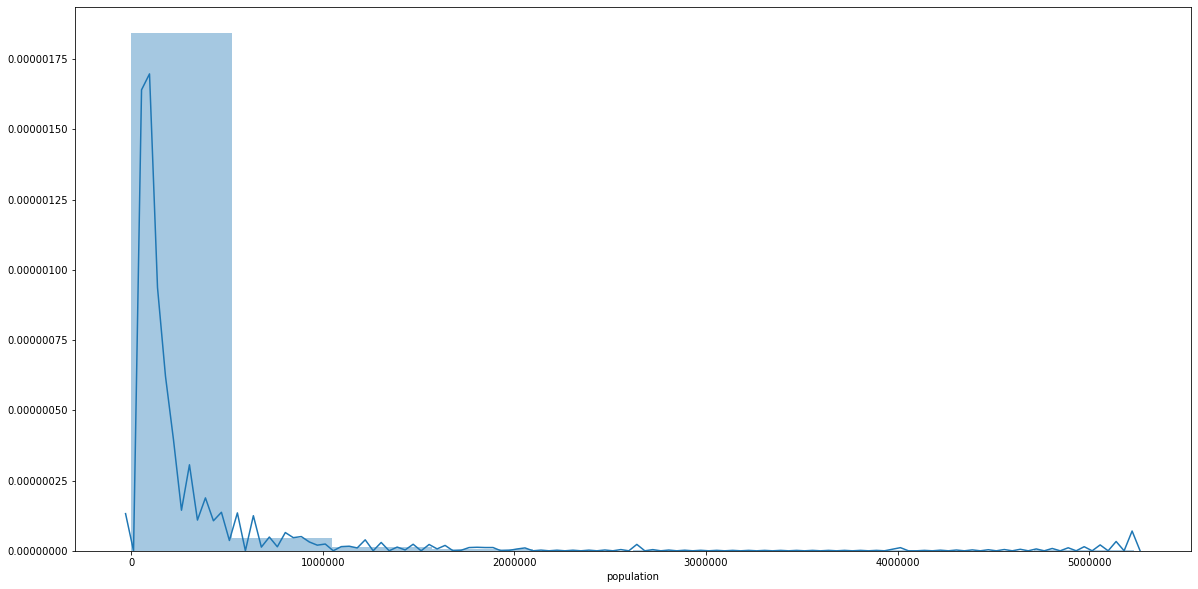

In [7]:
plt.figure(figsize=(20,10))
sns.distplot(testset.population,bins=10)
plt.show()

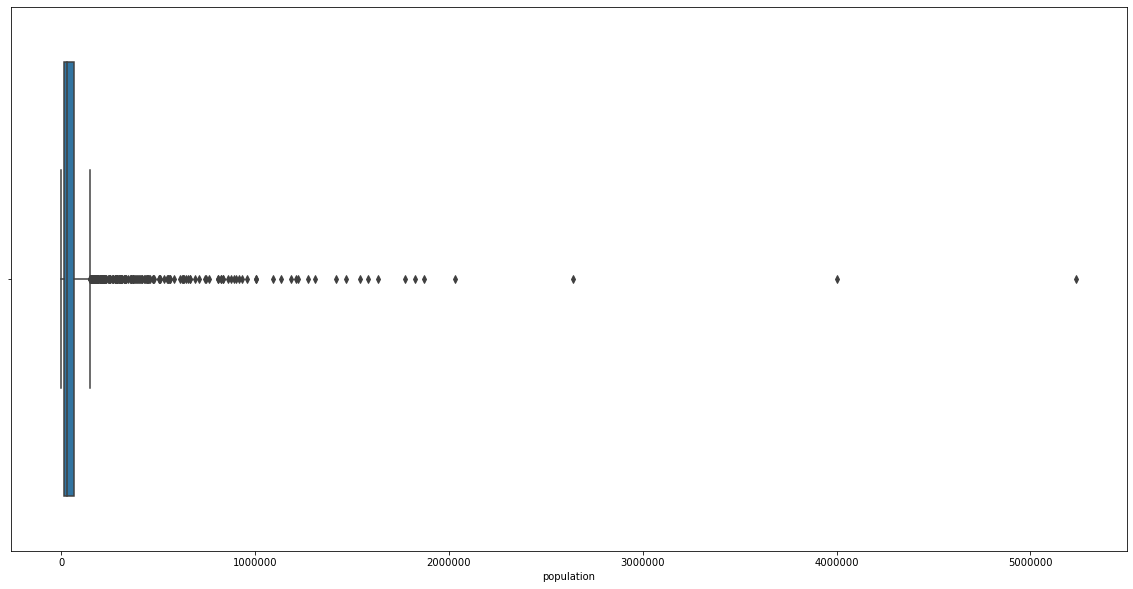

In [8]:
plt.figure(figsize=(20,10))
sns.boxplot(x=testset.population)
plt.show()

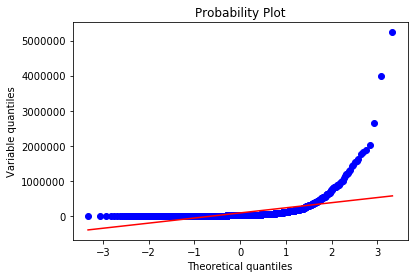

In [9]:
stats.probplot(testset['population'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

In [10]:
low = testset['population'].quantile(0.25)
high = testset['population'].quantile(0.75)
print(low,high)

11944.5 66845.75


In [11]:
interquantile_range = high - low
print(interquantile_range)

54901.25


In [12]:
lower_boundary = low - (interquantile_range*1.5)
upper_boundary = high + (interquantile_range*1.5)
print(lower_boundary)
print(upper_boundary)

-70407.375
149197.625


### Use Feature Engine to start clipping outliers using IQR

In [13]:
windsoriser = Winsorizer(distribution='skewed', tail='both', fold=1.5, variables=None)

In [14]:
windsoriser.fit(testset)

Winsorizer(distribution='skewed', fold=1.5, tail='both',
           variables=['population', 'renter_occupied_households',
                      'pct_renter_occupied', 'evictions', 'rent_burden',
                      'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind',
                      'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other',
                      'poverty_rate', 'pct_civilian_labor', 'pct_unemployment',
                      'pct_uninsured_adults', 'pct_uninsured_children',
                      'pct_adult_obesity', 'pct_adult_smoking', 'pct_diabetes',
                      'pct_low_birthweight', 'pct_excessive_drinking',
                      'pct_physical_inactivity',
                      'air_pollution_particulate_matter_value',
                      'homicides_per_100k',
                      'motor_vehicle_crash_deaths_per_100k',
                      'heart_disease_mortality_per_100k', 'pop_per_dentist',
                      'pop_per_primary_care_physici

In [15]:
testset_new = windsoriser.transform(testset)

In [16]:
testset_new

,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
0,52842.000,5403.000,26.84000,330.127474,27.960000,0.924234,0.025049,0.034351,0.001978,0.002308,0.000000,0.012080,0.000000,11.469000,0.436,0.075,0.21800,0.057000,0.284000,0.257000,0.114000,0.080000,0.08700,0.33200,13.194028,5.652345,19.830000,293.0,4880.000000,2710.000000,0.512000,0.215000,0.17700,0.174651,0.395210,0.274451,0.155689,9.828291,10.628268
1,149197.625,17617.625,46.63475,810.318686,33.072000,0.398318,0.241414,0.063760,0.001394,0.021801,0.000199,0.028500,0.001394,19.170000,0.524,0.062,0.22500,0.058000,0.282000,0.187000,0.097000,0.120000,0.16400,0.25200,12.419433,5.879425,10.830000,308.0,850.000000,1009.000000,0.522000,0.192000,0.11300,0.168327,0.230080,0.241036,0.360558,13.285546,8.818293
2,81263.000,13368.000,39.99400,810.318686,32.044000,0.483789,0.241414,0.099035,0.002509,0.009255,0.000800,0.018710,0.002772,17.408000,0.464,0.094,0.25000,0.081000,0.349000,0.121000,0.137000,0.099000,0.16515,0.30800,11.877446,5.879425,23.250000,269.0,2980.000000,2459.000000,0.526000,0.240000,0.15300,0.201816,0.329970,0.287588,0.180626,11.571830,10.136089
3,122870.000,17617.625,41.86500,330.127474,30.724000,0.468043,0.088393,0.190214,0.003210,0.026645,0.001252,0.021934,0.000984,18.560000,0.468,0.040,0.36800,0.148000,0.339000,0.226000,0.100000,0.099000,0.15000,0.32000,9.826327,5.879425,21.270000,340.0,2259.000000,1240.000000,0.491000,0.282000,0.11100,0.239563,0.277336,0.333996,0.149105,17.191860,10.089273
4,146153.000,15766.000,30.68100,644.000000,30.860000,0.651511,0.241414,0.047687,0.005197,0.016952,0.000900,0.025737,0.000700,10.460000,0.470,0.058,0.21100,0.084000,0.290000,0.191000,0.104000,0.090000,0.15300,0.24600,12.530045,5.652345,16.520000,263.0,1919.000000,2509.000000,0.516000,0.259000,0.10800,0.100100,0.289289,0.360360,0.250250,12.463880,6.432751
5,12511.000,1581.000,28.94100,5.000000,26.817000,0.950060,0.009855,0.024900,0.003894,0.003292,0.000000,0.007999,0.000000,9.740000,0.541,0.047,0.14000,0.040000,0.333000,0.149000,0.107000,0.070000,0.16515,0.26800,9.338021,5.794270,18.700000,323.0,3230.000000,1250.000000,0.517000,0.234000,0.18200,0.073000,0.403000,0.378000,0.146000,11.733460,14.111864
6,1334.000,134.000,18.62200,330.127474,38.622875,0.982142,0.000000,0.002975,0.004457,0.000000,0.000000,0.010427,0.000000,10.474000,0.547,0.050,0.19700,0.126000,0.300000,0.150000,0.118000,0.083731,0.16515,0.30600,9.645966,5.794270,21.381094,166.0,3517.072109,2619.026263,0.494000,0.153500,0.26750,0.139303,0.367164,0.341294,0.152239,5.610275,8.342814
7,71635.000,6210.000,23.38700,15.000000,18.547875,0.257180,0.005986,0.062671,0.013583,0.004314,0.000911,0.016096,0.000500,25.693875,0.295,0.117,0.26000,0.142000,0.318000,0.185000,0.148000,0.070000,0.13300,0.23500,9.768044,5.879425,43.220000,210.0,1639.000000,2490.000000,0.504000,0.301500,0.12200,0.232698,0.334002,0.324975,0.108325,13.578147,8.316268
8,149197.625,17617.625,38.82300,810.318686,31.199000,0.688774,0.064849,0.099817,0.009653,0.026645,0.001252,0.038228,0.001392,8.887000,0.463,0.070,0.19300,0.062000,0.316000,0.177000,0.102000,0.060000,0.15900,0.21500,10.666323,5.652345,8.180000,248.0,1419.000000,1470.000000,0.509000,0.245000,0.11700,0.090728,0.289133,0.371884,0.248255,13.951821,7.314335
9,11549.000,1170.000,21.7

In [17]:
testset_new.describe()

,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
count,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000
mean,47989.325587,5581.071621,28.395540,186.983704,28.500919,0.779621,0.066769,0.062843,0.004461,0.008533,0.000318,0.016654,0.000684,12.098106,0.471406,0.061873,0.214719,0.084501,0.306970,0.212424,0.107564,0.082955,0.163818,0.280018,11.616655,5.771691,21.156347,277.945431,3222.165145,2300.513890,0.502596,0.228282,0.166894,0.145105,0.348910,0.302245,0.200182,11.688624,10.375919
std,49007.683182,5898.716241,7.309193,230.517011,4.241047,0.187334,0.085512,0.060256,0.004547,0.008302,0.000449,0.009476,0.000877,5.262993,0.068084,0.021104,0.063739,0.035823,0.038853,0.054218,0.022119,0.018073,0.037244,0.052113,1.521033,0.074665,8.712550,58.778666,1645.460220,1159.583018,0.013432,0.029791,0.040488,0.063258,0.069689,0.051059,0.078847,2.325486,2.721595
min,117.000000,15.000000,9.206750,-1.000000,18.547875,0.257180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.287000,0.013000,0.039000,0.013000,0.212000,0.078000,0.047000,0.040000,0.087000,0.145000,6.965724,5.652345,3.690000,114.500000,460.000000,190.000000,0.473500,0.153500,0.063500,0.015984,0.167692,0.156660,0.018924,5.610275,3.015248
25%,11944.500000,1219.500000,23.242250,10.000000,26.076000,0.663229,0.005739,0.018686,0.001107,0.002405,0.000000,0.010148,0.000000,8.190750,0.425000,0.047000,0.167000,0.058000,0.284000,0.177000,0.092000,0.070000,0.144000,0.247000,10.468666,5.737500,14.857500,236.000000,1956.750000,1419.000000,0.496000,0.209000,0.140000,0.096952,0.305431,0.265265,0.141470,10.096672,8.533006
50%,26558.000000,2840.500000,27.389000,73.000000,28.728500,0.845921,0.021105,0.037291,0.002546,0.005447,0.000000,0.015126,0.000300,11.520500,0.474000,0.060000,0.214500,0.076000,0.308000,0.213584,0.107000,0.080000,0.165150,0.282000,11.816134,5.794270,21.320000,272.000000,2869.500000,2009.000000,0.505000,0.228000,0.164000,0.131671,0.350851,0.302605,0.180542,11.600847,10.438959
75%,66845.750000,7778.750000,32.599250,330.127474,31.094750,0.933928,0.100009,0.087298,0.006097,0.012101,0.000501,0.021380,0.001109,15.192000,0.517000,0.075000,0.258000,0.104000,0.332000,0.243000,0.122000,0.091000,0.182000,0.315000,12.879046,5.794270,26.202500,317.000000,3889.000000,2762.250000,0.511000,0.246000,0.191000,0.187282,0.397257,0.337669,0.242387,13.087604,12.211512
max,149197.625000,17617.625000,46.634750,810.318686,38.622875,0.997596,0.241414,0.190214,0.013583,0.026645,0.001252,0.038228,0.002772,25.693875,0.655000,0.117000,0.394500,0.173000,0.404000,0.342000,0.167000,0.122500,0.239000,0.417000,15.037129,5.879425,43.220000,438.500000,6787.375000,4777.125000,0.533500,0.301500,0.267500,0.322777,0.534996,0.446274,0.393763,17.574001,17.729270


### Check affected features after outlier treatment

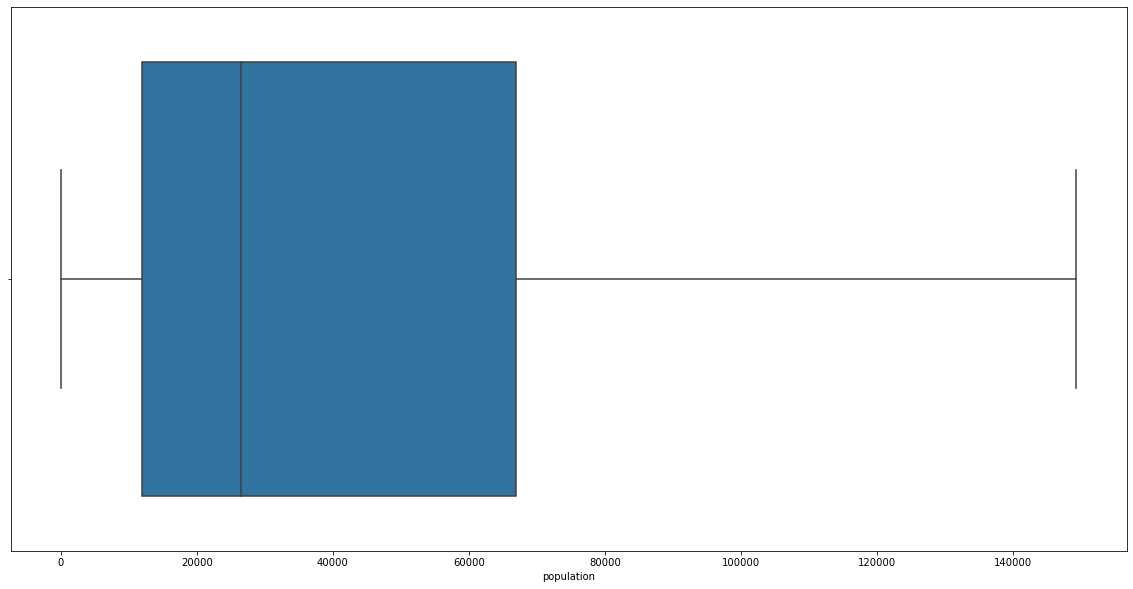

In [18]:
plt.figure(figsize=(20,10))
sns.boxplot(x=testset_new.population)
plt.show()

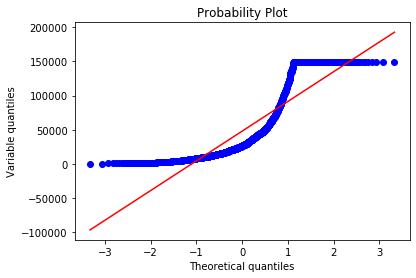

In [19]:
stats.probplot(testset_new['population'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

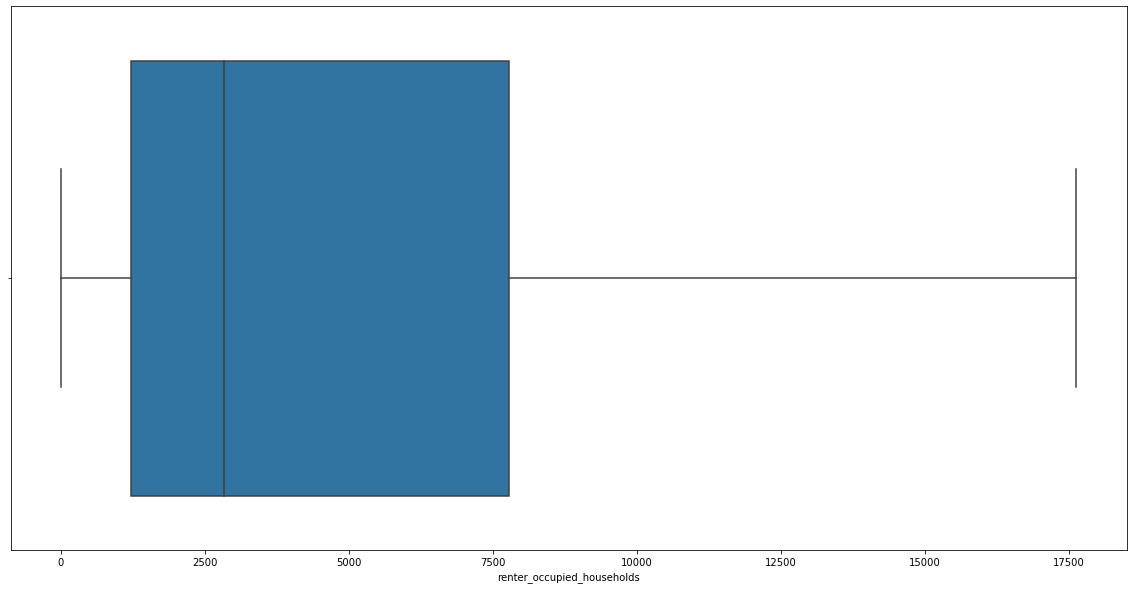

In [20]:
plt.figure(figsize=(20,10))
sns.boxplot(x=testset_new.renter_occupied_households)
plt.show()

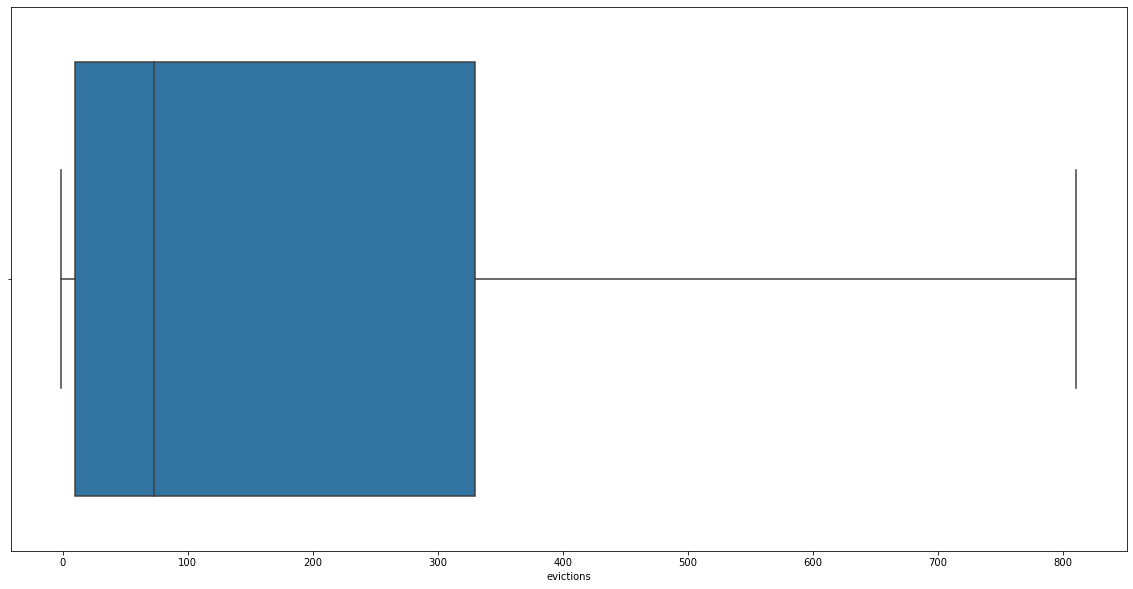

In [21]:
plt.figure(figsize=(20,10))
sns.boxplot(x=testset_new.evictions)
plt.show()

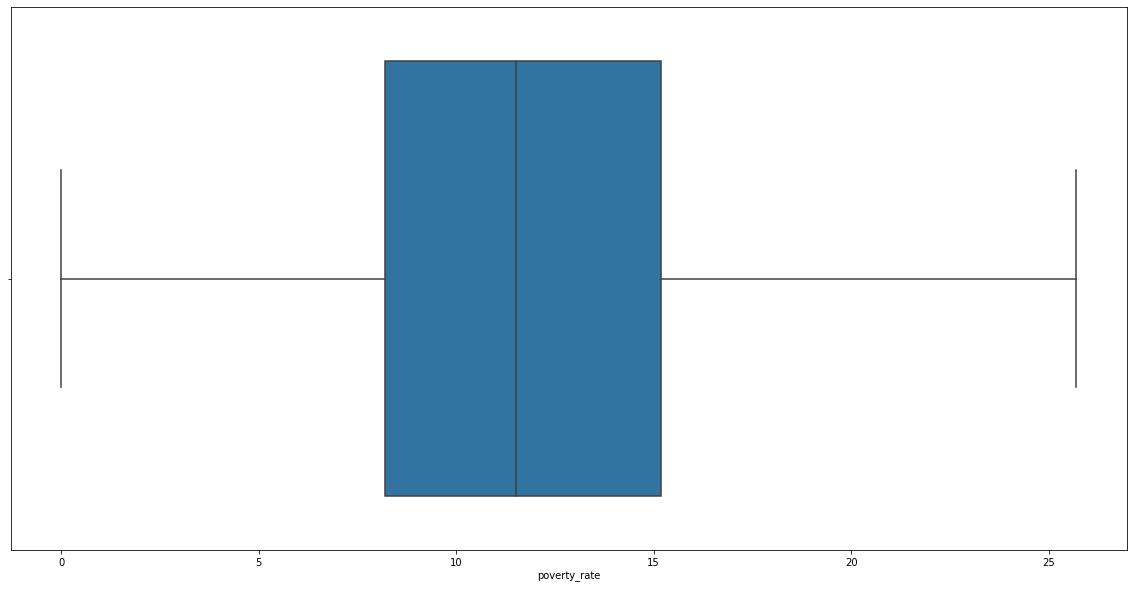

In [22]:
plt.figure(figsize=(20,10))
sns.boxplot(x=testset_new.poverty_rate)
plt.show()

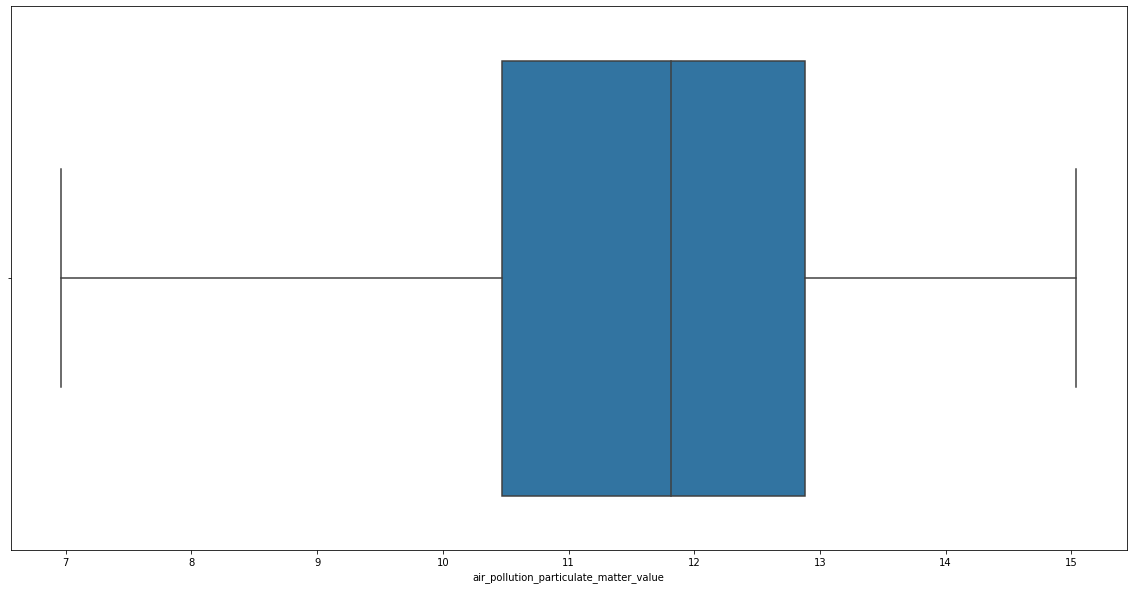

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(x=testset_new.air_pollution_particulate_matter_value)
plt.show()

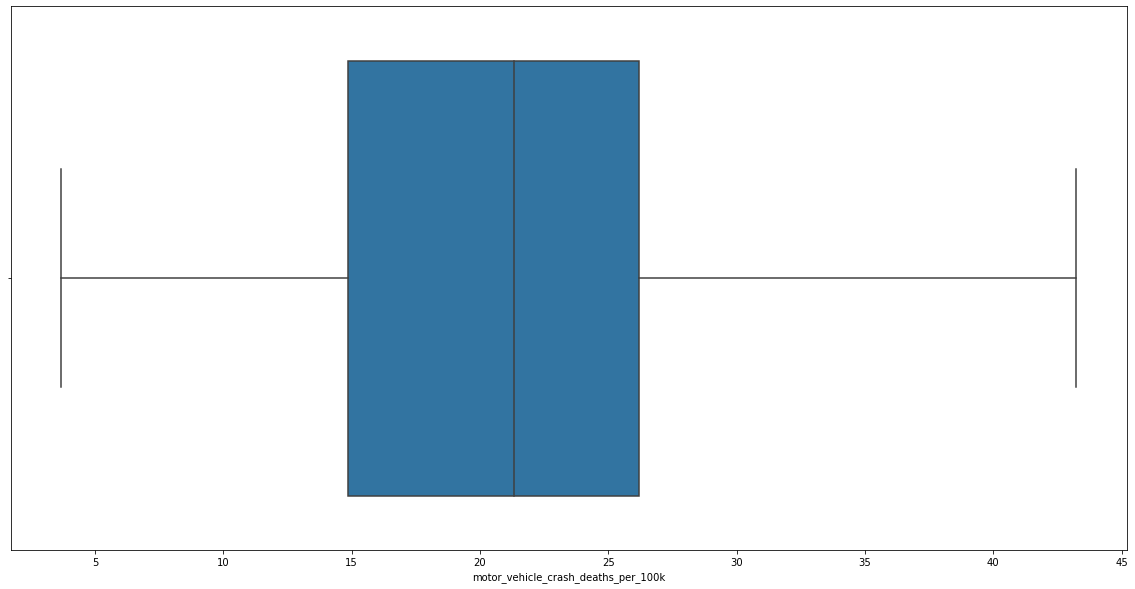

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(x=testset_new.motor_vehicle_crash_deaths_per_100k)
plt.show()

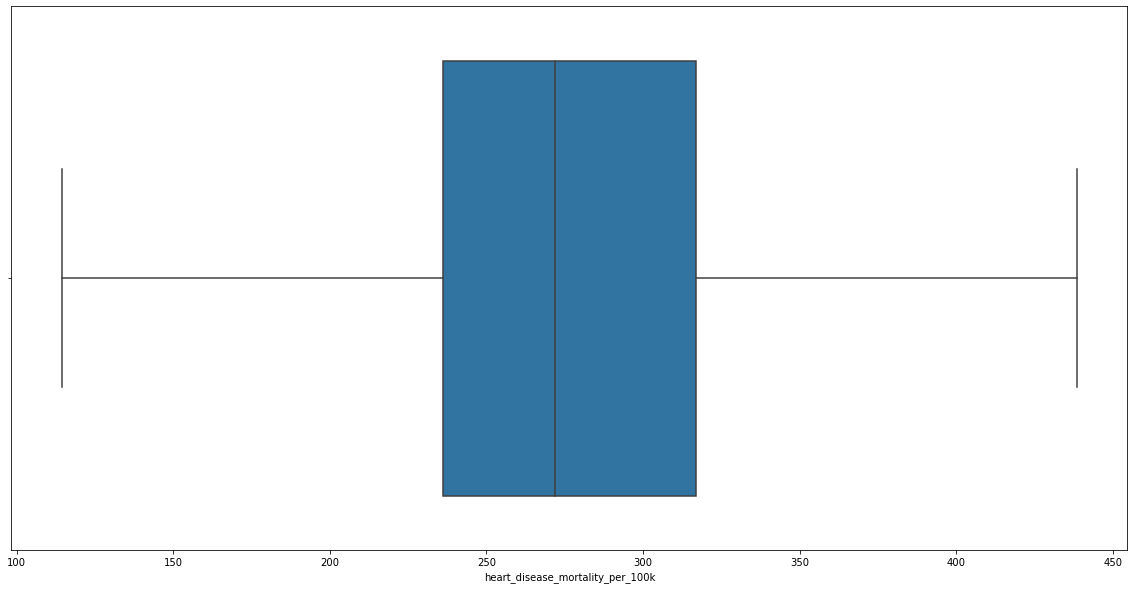

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(x=testset_new.heart_disease_mortality_per_100k)
plt.show()

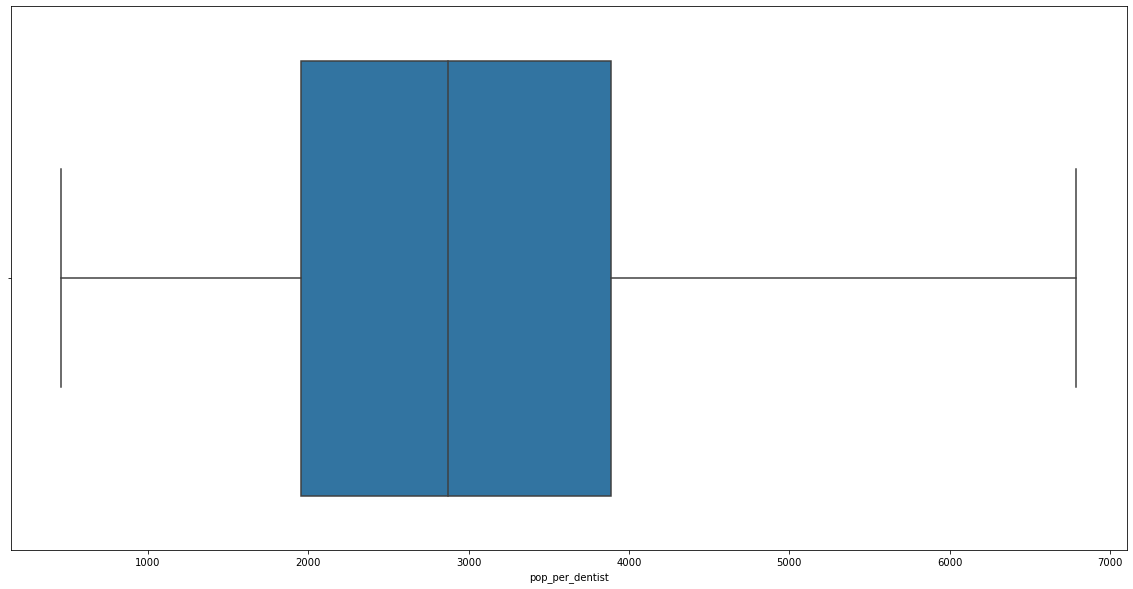

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(x=testset_new.pop_per_dentist)
plt.show()

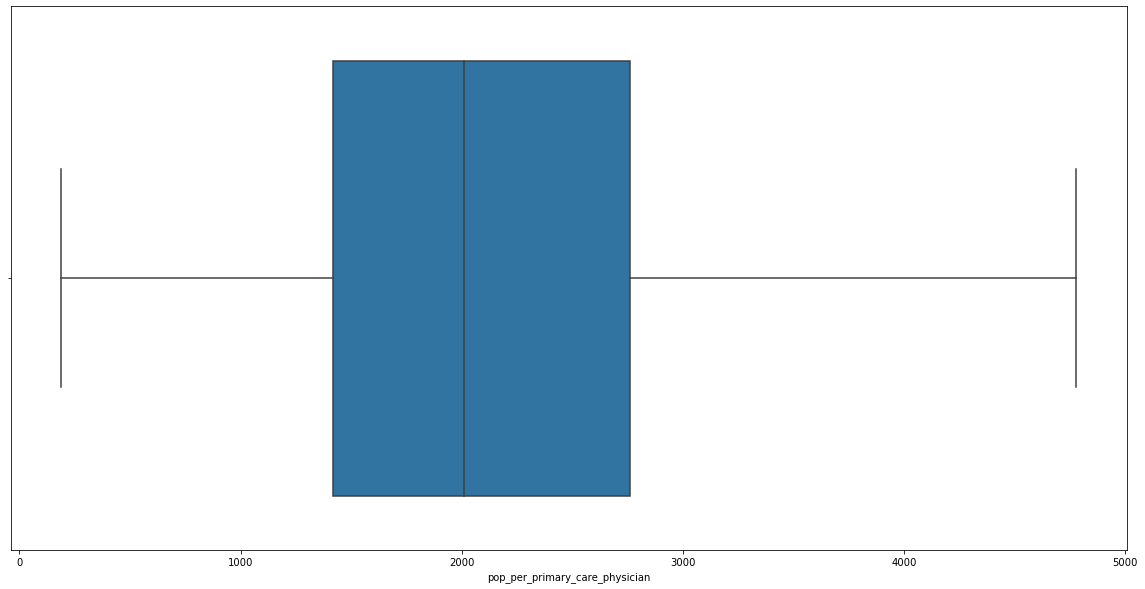

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(x=testset_new.pop_per_primary_care_physician)
plt.show()

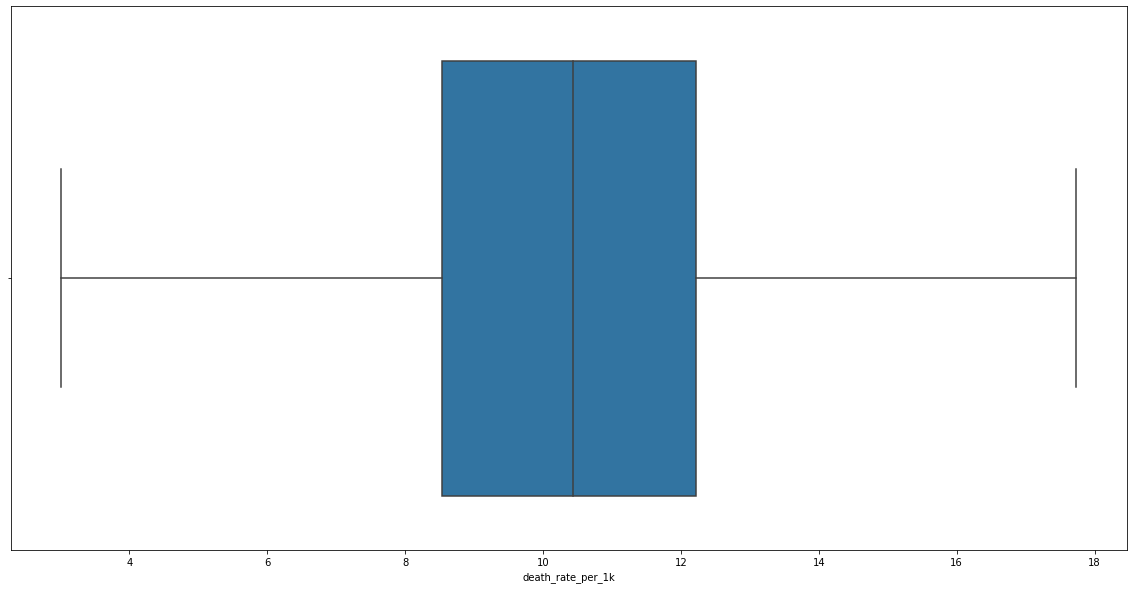

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(x=testset_new.death_rate_per_1k)
plt.show()

In [29]:
#testset_new.to_csv('testoutlier.csv',index=False)